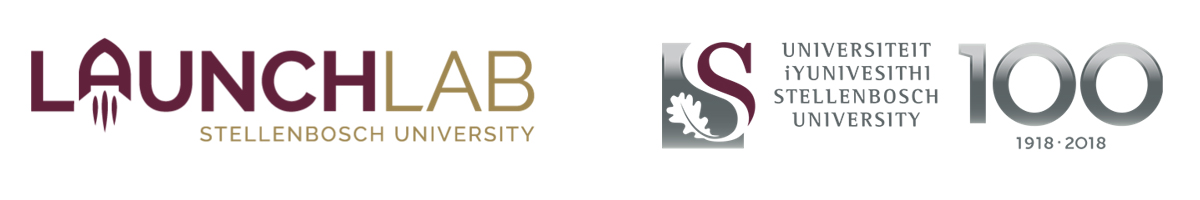

# Assignment 5 Part 2: Seaborn
The following assignment is based on the data in diamonds.csv

The features are described as follows:

Carat: a unit of weight.

Cut: the quality of the diamond's cut.

Color: the color code of the diamond.

Clarity: the clarity code of the diamond.

Depth: the size of the diamond's depth as a percentage.

Table: the size of the diamond's table as a percentage.

Price: the price of the diamond.

x, y, z: the dimensions of the diamond.

## For this assignment all plots should be written using the **seaborn** package.

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
%matplotlib inline

df = pd.read_csv('src/diamonds.csv',index_col=0).reset_index(drop=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.53,Ideal,D,VS,61.4,56.0,1857,5.20,5.23,3.20
1,0.70,Very Good,D,SI,63.4,58.0,2734,5.63,5.66,3.58
2,1.00,Premium,G,VS,62.0,62.0,6115,6.38,6.33,3.94
3,1.22,Premium,D,SI,61.8,58.0,5643,6.86,6.80,4.22
4,0.41,Very Good,E,VS,62.7,58.0,833,4.68,4.73,2.95


# Analysing Counts

## For each catergorical feature, visualise the counts using a barplot.

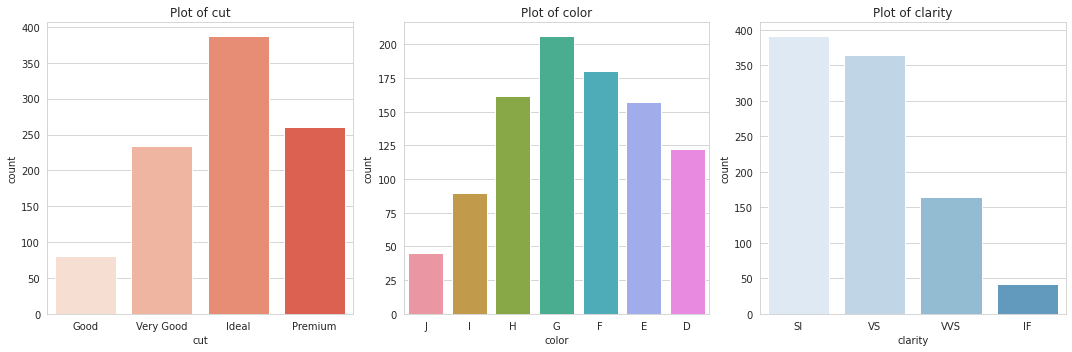

In [119]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
categories = ['cut','color','clarity']

# insert code here
sns.set_style('whitegrid')
palettes = ['Reds', None, 'Blues']
orders = [['Good', 'Very Good', 'Ideal', 'Premium'], ['J', 'I', 'H', 'G', 'F', 'E', 'D'], ['SI', 'VS', 'VVS', 'IF']]

for i in range(3):
    sns.set_palette(palettes[i])
    sns.countplot(x=categories[i], data=df, ax=ax[i], order=orders[i])
    ax[i].set_title('Plot of ' + categories[i])

plt.tight_layout()
plt.show()

# Identifying outliers
 
## Plot for the following features boxplots to identify any outliers:
carat, depth, table and price

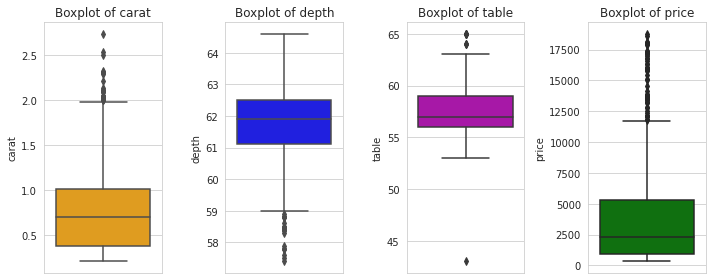

In [120]:
fig, ax = plt.subplots(1,4, figsize=(10,4))
categories = ['carat','depth','table','price']

#insert code here
palettes = [['orange'], ['b'], ['m'], ['g']]
for i in range(4):
    sns.set_palette(palettes[i])
    sns.boxplot(y=categories[i], data=df, ax=ax[i])
    ax[i].set_title('Boxplot of ' + categories[i])

plt.tight_layout()
plt.show()

There are many different techniques to detect outliers, here we will be using inter-quartile range (as used by matplotlib/seaborn).

Consider any points outside of 1.5 $\times$ IQR from a quartile as an outlier.

## Write code to remove these outliers from the dataframe
By removing any outliers, it is now easier to visualise the distributions of the dataset

In [121]:
categories = ['carat','depth','table','price']

for category in categories:
    # compute IQR
    q1 = df[category].quantile(0.25)
    q3 = df[category].quantile(0.75)
    iqr = q3 - q1 
    lower = q1 - iqr*1.5
    upper = q3 + iqr*1.5
    # Update DF
    df = df[(df[category] > lower) & (df[category] < upper)]

## Once again plot the boxplots for the following features:
carat, depth, table and price

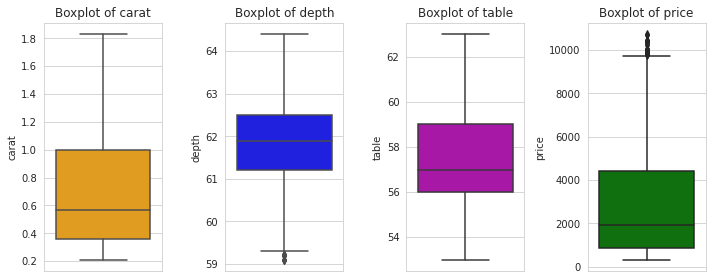

In [122]:
fig, ax = plt.subplots(1,4, figsize=(10,4))
categories = ['carat','depth','table','price']

# insert code here
palettes = [['orange'], ['b'], ['m'], ['g']]
for i in range(4):
    sns.set_palette(palettes[i])
    sns.boxplot(y=categories[i], data=df, ax=ax[i])
    ax[i].set_title('Boxplot of ' + categories[i])

plt.tight_layout()
plt.show()

## Explain why the boxplots above have fliers that indicate there are still outliers present in the data?
*Once we remove the data we have a new set of data.  The new boxplots are calculated from scratch and the new data may contain outliers as we have a new set of data we are working with*

# Analysing continuous features
## Visualise the correlation of the following features:

x, y ,z and carat

Use a multi-plot grid that incorporates scatterplots and histograms in its diagonal.

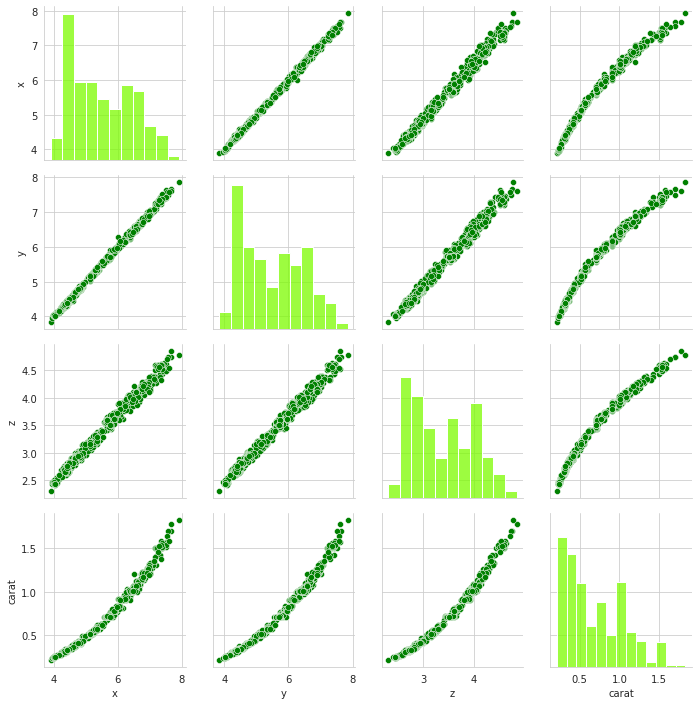

In [123]:
# insert code here
g = sns.PairGrid(df[['x', 'y', 'z', 'carat']])
sns.set_palette(['lawngreen'])
g.map_diag(sns.histplot)
sns.set_palette(['g'])
g.map_offdiag(sns.scatterplot)


## Comment on the reletionship between these features.
*Every Pair has a positive correlation*

## Can you explain the non-linear relationship carat exhibits with the remaining features?
*As the dimensions increase, the volume also increases, but it increases non-linearly*


## Visualise the distributions of the following variables:
carat, table, depth and price

### Use a multi-plot grid that incorporates scatterplots in its upper half, histograms in its diagonal and contourplots in its lower half.

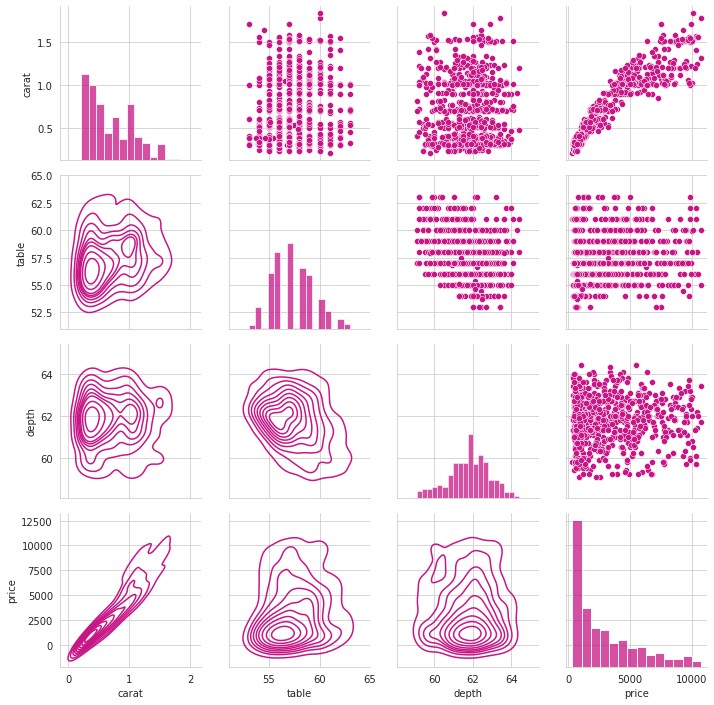

In [127]:
# insert code here
sns.set_palette(['mediumvioletred'])
g = sns.PairGrid(df[['carat', 'table', 'depth', 'price']])
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)

## What conclusions can you draw from the multi-plot above?
*It seems that only carat and price has a positive correlation.  The other pairs don't seem to have any correlation*

## Conditional plots
Visualise the relationship **'cut'** exhibits on the following features:

carat, table, depth and price

### Use a multi-plot grid with scatterplots and density functions on the diagonal.

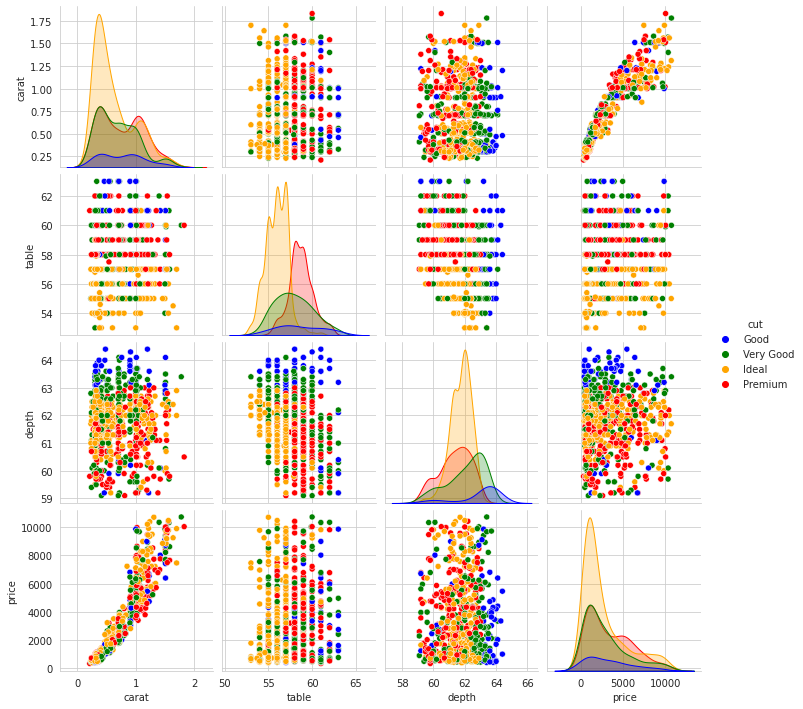

In [143]:
# insert code here
#g = sns.PairGrid(df[['carat', 'table', 'depth', 'price', 'cut']], hue="cut", palette="GnBu_d")
sns.pairplot(df[['carat', 'table', 'depth', 'price', 'cut']], hue="cut", height=2.5, palette=['b', 'g', 'orange', 'r'], hue_order=['Good', 'Very Good', 'Ideal', 'Premium'])

## Where is the difference between diamonds with 'Ideal' vs 'Premium' cuts most visible? Explain.
*Every pair with 'table' as the ideal and premium are clearly seperated there*


## Discuss with the help of a heatmap the correlation of the following variables:
Carat, depth, table and price

## Furthermore what does this correlation tell us of a diamond?

<AxesSubplot:>

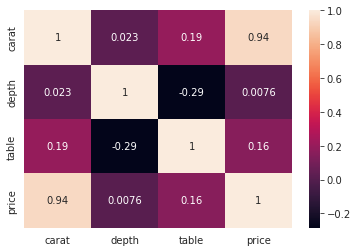

In [156]:
# insert code here
sns.heatmap(df[['carat', 'depth', 'table', 'price']].corr(), annot=True)

*Price and carat are definitely positively correlated.  The other pairs don't seem to be much correlated.*

# Categorical features

## To visualise the distributions of each category, plot boxplots for each of the following features:
(Price, carat, table, depth) vs (cut, color, clarity)

### Furthermore, order the boxplots within a plot by their mean value
Hint: pd.sort_values() is your friend.

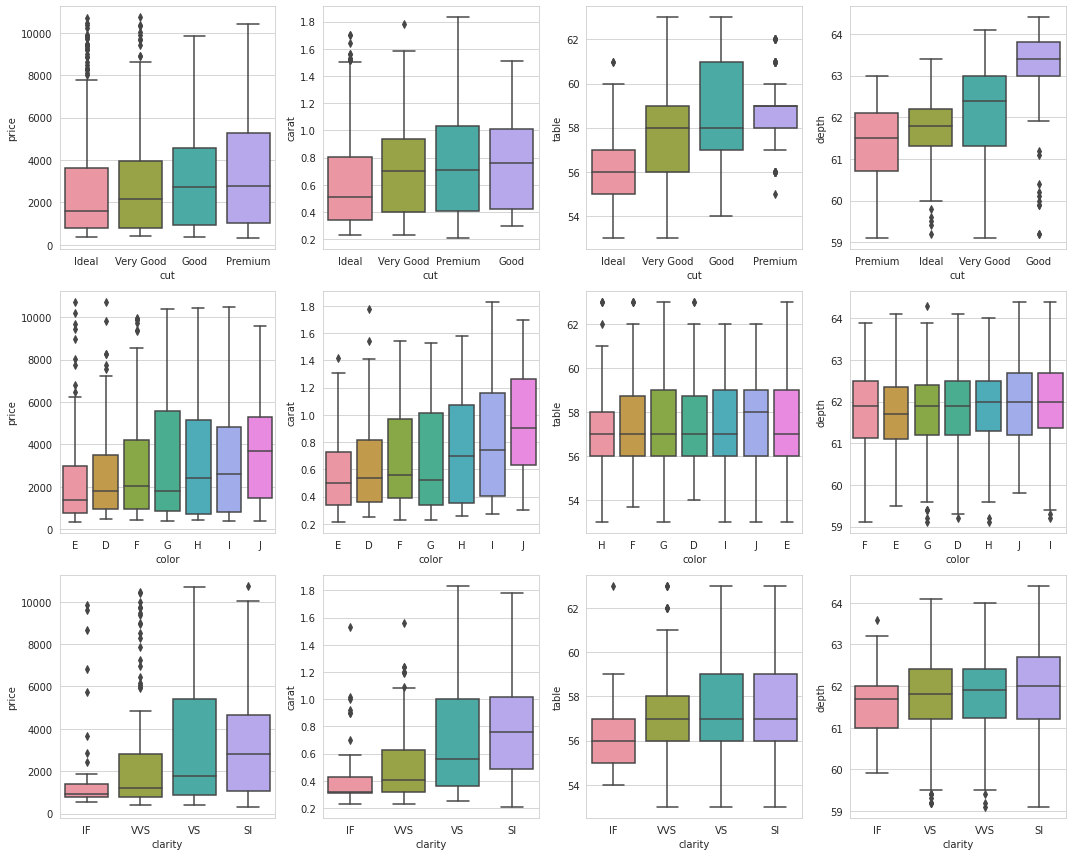

In [264]:
fig, ax = plt.subplots(3,4, figsize=(15,12))
features = ['price','carat','table','depth']
categories = ['cut','color','clarity']

for category in categories:
    for feature in features:
        df1 = df.groupby(category)[feature].mean().sort_values()
        index_sort = df1.index
        sns.boxplot(x=category, y=feature, data=df, order=index_sort, ax=ax[categories.index(category), features.index(feature)])
        
        
        

plt.tight_layout()
plt.show()

## Discuss any visible tendencies that can be exhibited in the plots above.

*Cut and clarity causes quite the change in mean over the given features and color doesn't seem to influence as much*

## Which single categorical feature has the largest influence on each of the numerical features?
*Cut*
